<a href="https://colab.research.google.com/github/brunomoraisnc/linear-regression/blob/master/Linear_Regression_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [0]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')

In [0]:
print(train.head())
print('\n------------\n')
print(train.info(), '\n------------------------------\n')
print(train.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
lat

In [0]:
print(test.head())
print('\n------------\n')
print(test.info(), '\n------------------------------\n')
print(test.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             3000 non-null float64
latitu

In [0]:
df = pd.concat([train, test], axis=0)

In [0]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             20000 non-null float64
latitude              20000 non-null float64
housing_median_age    20000 non-null float64
total_rooms           20000 non-null float64
total_bedrooms        20000 non-null float64
population            20000 non-null float64
households            20000 non-null float64
median_income         20000 non-null float64
median_house_value    20000 non-null float64
dtypes: float64(9)
memory usage: 1.5 MB


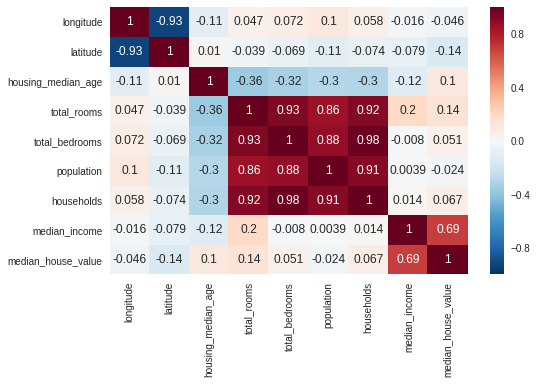

In [0]:
corr = df.corr()
_ = sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.show()

In [0]:
df = df.drop(['longitude', 'latitude'], axis=1)

In [0]:
df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [0]:
# feature, target

target = 'median_house_value'

X_train = train.drop(target, axis=1)
y_train = train.loc[:, target].values

X_test = test.drop(target, axis=1)
y_test = test.loc[:, target].values

In [0]:
print(X_train.info())
print('\n------------\n')
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 8 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB
None

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
longitude             3000 non-null float64
latitude              3000 non-null float64
housing_median_age    3000 non-null float64
total_rooms           3000 non-null float64
total_bedrooms        3000 non-null float64
population            3000 non-null float64
households            3000 non-null float64
median_income         3000 non-null float64
dtypes: float6

In [0]:
# Classificador

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#y_train_pred = clf.predict(X_train)
#y_test_pred = clf.predict(X_test)

In [0]:
print('Scores:\n')

print('Train: ', clf.score(X_train, y_train))
print('Test: ', clf.score(X_test, y_test))


Scores:

Train:  0.6413378529502686
Test:  0.6195057678312047


In [0]:
print(type(y_train))
print(type(y_train_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
y_train[:20]

array([66900., 80100., 85700., 73400., 65500., 74000., 82400., 48500.,
       58400., 48100., 86500., 62000., 48600., 70400., 45000., 69100.,
       94900., 25000., 44000., 27500.])

In [0]:
y_train_pred[:20]

array([  7128.08452517,  73675.60144224, -31317.28531191,  40802.4668883 ,
        -4058.80612234,  48743.7064738 ,  30352.15844108, -50246.92210369,
        32864.59160504, -24391.15394078,  13649.35736798, -14582.41207715,
       -23662.33833056,  -1902.43871711, -20269.18485216, -56747.33612708,
        45213.19045323, -21013.85056953,   7266.20588325, -57413.71992641])